In [ ]:
# prompt: give me the code to connect with the google colab with drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load dataset
file_path = '/content/drive/My Drive/diabetic_retinopathy.csv'
data = pd.read_csv(file_path)

In [ ]:
# Display first few rows and data summary
print("Dataset Preview:")
print(data.head())
print("\nData Summary:")
print(data.describe())

Dataset Preview:
   quality  pre_screening  ma1  ma2  ma3  ma4  ma5  ma6   exudate1   exudate2  \
0        1              1   22   22   22   19   18   14  49.895756  17.775994   
1        1              1   24   24   22   18   16   13  57.709936  23.799994   
2        1              1   62   60   59   54   47   33  55.831441  27.993933   
3        1              1   55   53   53   50   43   31  40.467228  18.445954   
4        1              1   44   44   44   41   39   27  18.026254   8.570709   

    exudate3  exudate3.1  exudate5  exudate6  exudate7  exudate8  \
0   5.270920    0.771761  0.018632  0.006864  0.003923  0.003923   
1   3.325423    0.234185  0.003903  0.003903  0.003903  0.003903   
2  12.687485    4.852282  1.393889  0.373252  0.041817  0.007744   
3   9.118901    3.079428  0.840261  0.272434  0.007653  0.001531   
4   0.410381    0.000000  0.000000  0.000000  0.000000  0.000000   

   macula_opticdisc_distance  opticdisc_diameter  am_fm_classification  Class  
0      

In [ ]:
data.head(7)

,quality,pre_screening,ma1,ma2,ma3,ma4,ma5,ma6,exudate1,exudate2,exudate3,exudate3.1,exudate5,exudate6,exudate7,exudate8,macula_opticdisc_distance,opticdisc_diameter,am_fm_classification,Class
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
5,1,1,44,43,41,41,37,29,28.356400,6.935636,2.305771,0.323724,0.000000,0.000000,0.000000,0.000000,0.502831,0.126741,0,1
6,1,0,29,29,29,27,25,16,15.448398,9.113819,1.633493,0.000000,0.000000,0.000000,0.000000,0.000000,0.541743,0.139575,0,1


In [ ]:
# Data Preprocessing: Handle missing values and normalize continuous features
# Check for missing values
print("\nMissing Values per Column:")
print(data.isnull().sum())


Missing Values per Column:
quality                      0
pre_screening                0
ma1                          0
ma2                          0
ma3                          0
ma4                          0
ma5                          0
ma6                          0
exudate1                     0
exudate2                     0
exudate3                     0
exudate3.1                   0
exudate5                     0
exudate6                     0
exudate7                     0
exudate8                     0
macula_opticdisc_distance    0
opticdisc_diameter           0
am_fm_classification         0
Class                        0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizing continuous features
continuous_features = [
    'exudate1', 'exudate2', 'exudate3', 'exudate5',
    'exudate6', 'exudate7', 'exudate8', 'macula_opticdisc_distance', 'opticdisc_diameter'
]
scaler = StandardScaler()
data[continuous_features] = scaler.fit_transform(data[continuous_features])

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Split dataset into features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

<ipython-input-10-66b0f3c5d716>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='Set2')


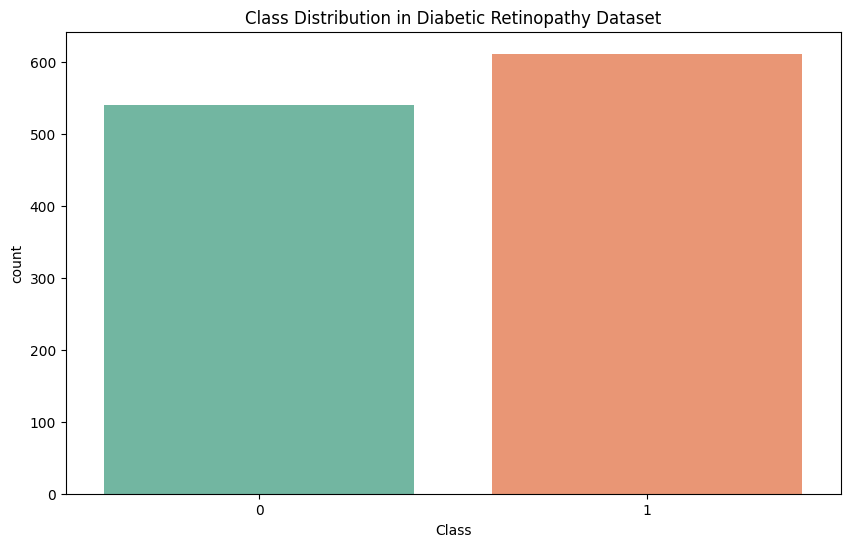

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=data, palette='Set2')
plt.title("Class Distribution in Diabetic Retinopathy Dataset")
plt.show()


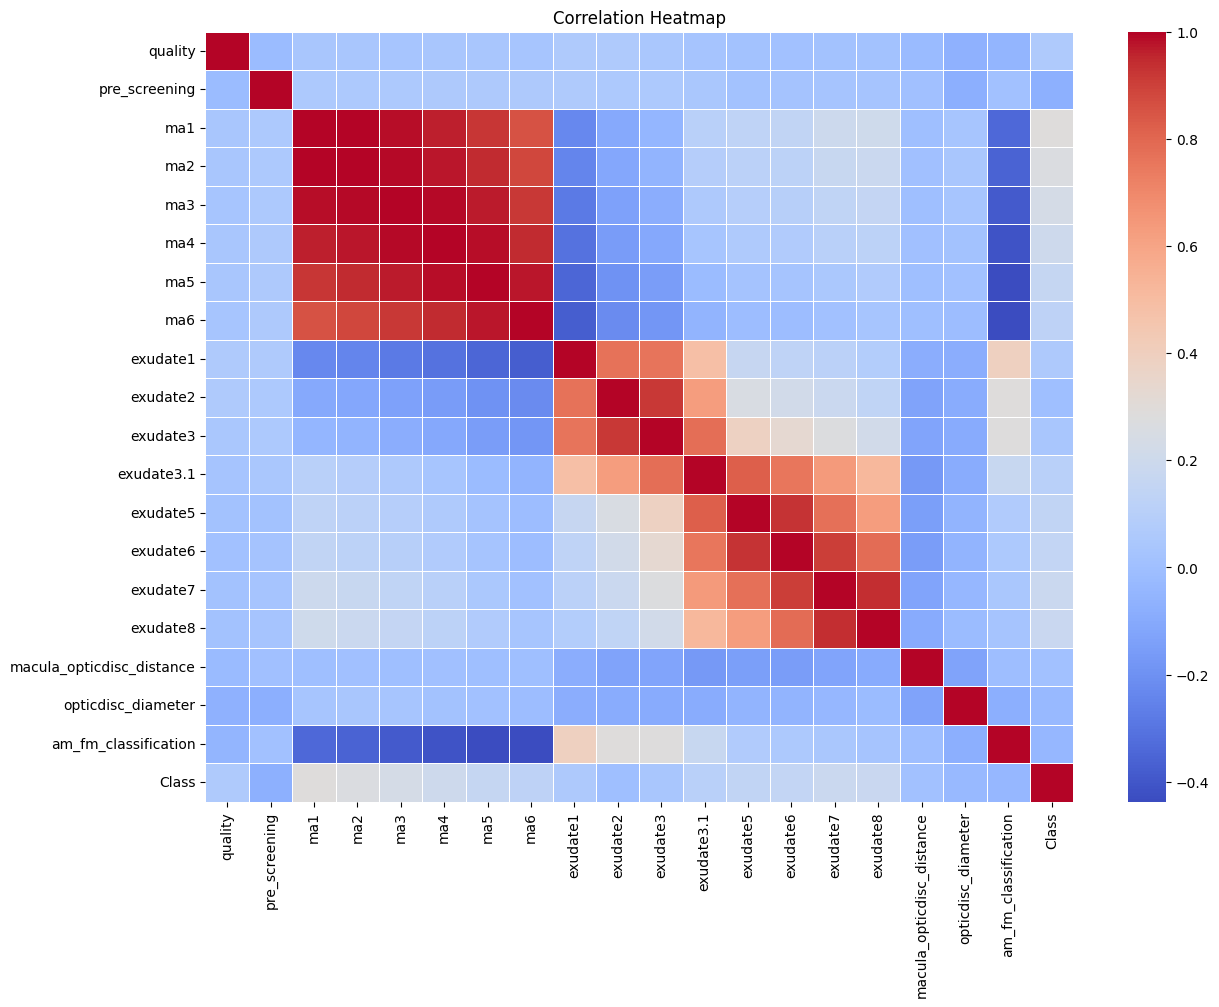

In [ ]:
# Heatmap of correlations
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

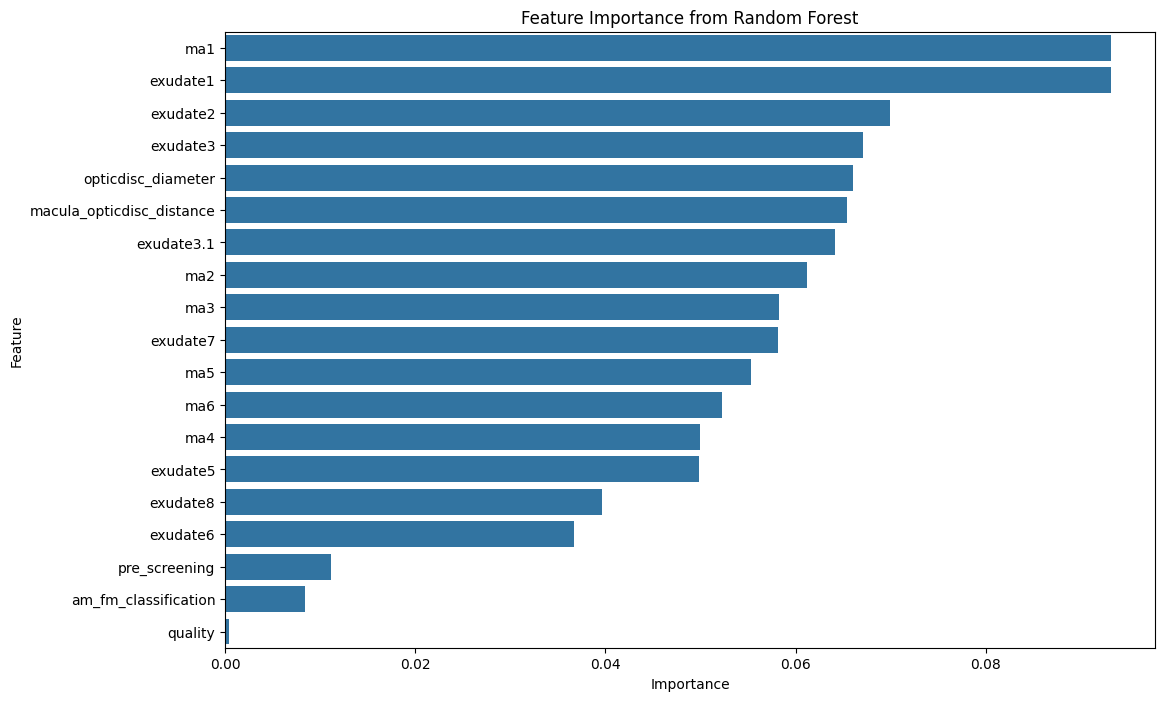

In [ ]:
# Feature Importance with Random Forest
from sklearn.ensemble import RandomForestClassifier

# Feature Importance with Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Plot feature importance
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

In [ ]:
# Select top N features based on importance
top_features = importance_df[importance_df['Importance'] > 0.02]['Feature'].tolist()  # Customize threshold
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [ ]:
# Model Training

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


# Support Vector Machine (SVM)
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_selected, y_train)
y_pred_svm = svm_model.predict(X_test_selected)

In [ ]:
# Model Evaluation Function
def evaluate_model(name, y_test, y_pred):
    print(f"Evaluation Metrics for {name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("---------------------------------------------------")

# Evaluate all models
evaluate_model("SVM", y_test, y_pred_svm)

Evaluation Metrics for SVM:
Accuracy: 0.6379310344827587
Precision: 0.7555555555555555
Recall: 0.5230769230769231
F1 Score: 0.6181818181818182
ROC-AUC: 0.6536953242835596

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.78      0.66        51
           1       0.76      0.52      0.62        65

    accuracy                           0.64       116
   macro avg       0.66      0.65      0.64       116
weighted avg       0.67      0.64      0.63       116

---------------------------------------------------


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_selected, y_train)
y_pred_nb = nb_model.predict(X_test_selected)


evaluate_model("Naïve Bayes", y_test, y_pred_nb)

Evaluation Metrics for Naïve Bayes:
Accuracy: 0.49137931034482757
Precision: 0.6875
Recall: 0.16923076923076924
F1 Score: 0.2716049382716049
ROC-AUC: 0.5355957767722473

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.90      0.61        51
           1       0.69      0.17      0.27        65

    accuracy                           0.49       116
   macro avg       0.57      0.54      0.44       116
weighted avg       0.59      0.49      0.42       116

---------------------------------------------------


In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_selected, y_train)
y_pred_rf = rf_model.predict(X_test_selected)

evaluate_model("Random Forest", y_test, y_pred_rf)

Evaluation Metrics for Random Forest:
Accuracy: 0.7241379310344828
Precision: 0.7619047619047619
Recall: 0.7384615384615385
F1 Score: 0.75
ROC-AUC: 0.7221719457013573

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.71      0.69        51
           1       0.76      0.74      0.75        65

    accuracy                           0.72       116
   macro avg       0.72      0.72      0.72       116
weighted avg       0.73      0.72      0.72       116

---------------------------------------------------


In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_selected, y_train)
y_pred_lr = lr_model.predict(X_test_selected)

evaluate_model("Logistic Regression", y_test, y_pred_lr)

Evaluation Metrics for Logistic Regression:
Accuracy: 0.7586206896551724
Precision: 0.8363636363636363
Recall: 0.7076923076923077
F1 Score: 0.7666666666666667
ROC-AUC: 0.7656108597285068

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.82      0.75        51
           1       0.84      0.71      0.77        65

    accuracy                           0.76       116
   macro avg       0.76      0.77      0.76       116
weighted avg       0.77      0.76      0.76       116

---------------------------------------------------


In [ ]:
# Hyperparameter Tuning for Random Forest (as an example)
param_grid = {
    'n_estimators': [300, 400, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_selected, y_train)
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_selected)
print("Best Parameters for Random Forest:", grid_search.best_params_)

evaluate_model("Best Random Forest (Tuned)", y_test, y_pred_best_rf)

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}
Evaluation Metrics for Best Random Forest (Tuned):
Accuracy: 0.7241379310344828
Precision: 0.7796610169491526
Recall: 0.7076923076923077
F1 Score: 0.7419354838709677
ROC-AUC: 0.7263951734539971

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.75      0.70        51
           1       0.78      0.71      0.74        65

    accuracy                           0.72       116
   macro avg       0.72      0.73      0.72       116
weighted avg       0.73      0.72      0.73       116

---------------------------------------------------


In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Hybrid Model: Voting Classifier (Ensemble of SVM, Naïve Bayes, Random Forest, and Logistic Regression)
hybrid_model = VotingClassifier(
    estimators=[
        ('rf', best_rf_model),
        ('lr', lr_model)
    ],
    voting='soft'
)
hybrid_model.fit(X_train_selected, y_train)
y_pred_hybrid = hybrid_model.predict(X_test_selected)


evaluate_model("Hybrid Voting Classifier", y_test, y_pred_hybrid)

Evaluation Metrics for Hybrid Voting Classifier:
Accuracy: 0.75
Precision: 0.8103448275862069
Recall: 0.7230769230769231
F1 Score: 0.7642276422764228
ROC-AUC: 0.7536953242835596

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.78      0.73        51
           1       0.81      0.72      0.76        65

    accuracy                           0.75       116
   macro avg       0.75      0.75      0.75       116
weighted avg       0.76      0.75      0.75       116

---------------------------------------------------
